In [16]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chisqprob
from scipy.stats import chisquare
%matplotlib inline
from os import listdir
from os.path import isfile, join

In [17]:
# Set the font path properly here if not using Windows. Otherwise just comment this out
plt.style.use('ggplot')
font_path = 'C:\Windows\Fonts\Arial.ttf'
font_prop = font_manager.FontProperties(size=16)
title_font = {'fontname':'Arial', 'size':'17', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'20','weight':'bold'}
xtickFont = 17
ytickFont = 17

arrayOfColor = ['#B21212','#0971B2','#FFFC19','#12B286','#9C00B2',
                '#8AFF19','#071A66','#FF2CC1','#38CACC','#FF8F0A']

In [18]:
def ShowGraph(trends,labels,numberOfPlot):
    graphFileName = '{0}\\{1}_{2}.png'.format(folderLocationImages20,
                                                  blockageType,numberOfPlot)
    fig = plt.figure(figsize=(12, 8), dpi=400)
    ax = plt.subplot(111)
    i=0
    print(numberOfPlot)
    if numberOfPlot == 1:
        for trend in trends:
            ax.plot(trend, marker='o', label=labels[i],color=arrayOfColor[i])
            i += 1
    else:
        for trend in trends:
            ax.plot(trend, marker='o', label=labels[i],color=arrayOfColor[5+i])
            i += 1
        

    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13),
              fancybox=True, shadow=True, ncol=5)
    plt.xticks(fontsize = xtickFont)
    plt.yticks(fontsize = ytickFont)
    plt.xlabel('Month/Year', **axis_font)
    plt.ylabel('Blockage Count', **axis_font)
    plt.savefig(graphFileName, dpi=400)
    #plt.show()

In [19]:
# blockageTypes = ['TotalCount','SanitaryProductsCount','UnknownCount']
# blockageTypeNames = ['Total Blockages','Sanitary Products','Missing\\Unknown']
blockageTypes = ['TotalCount']
blockageTypeNames = ['Total Blockages']

folderLocationData20 = "C:\\Users\\lenovo\\Documents\\Dissertation\\Report\\" \
                       "DataFiles\\GridFiles_Reduced_5km"
folderLocationImages20 = "C:\\Users\\lenovo\\Documents\\Dissertation\\Report\\" \
                         "Images\\\GridImages5km_reduced"

onlyfiles = [f for f in listdir(folderLocationData20) if isfile(join(folderLocationData20, f))]
dateparseMonthly = lambda dates: pd.datetime.strptime(dates, '%m/%Y')
arrayOfTimeSeries = []
arrayOfLabels = []
i= 1
numberOfplots= 1

1
2


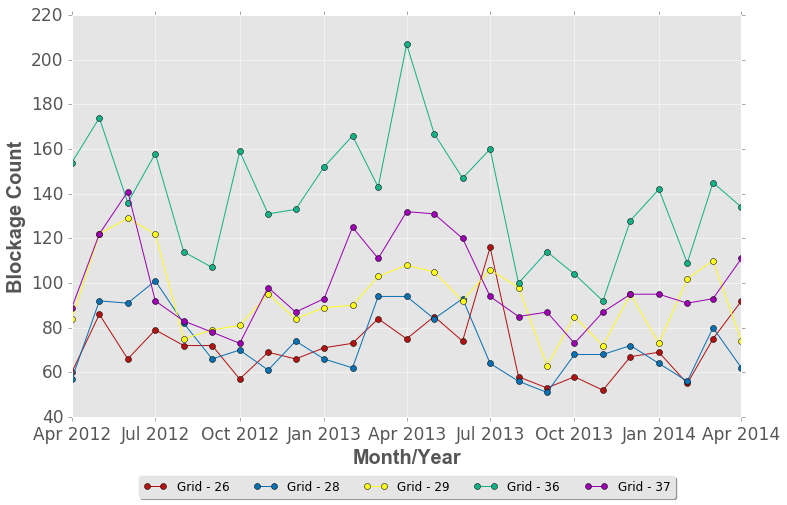

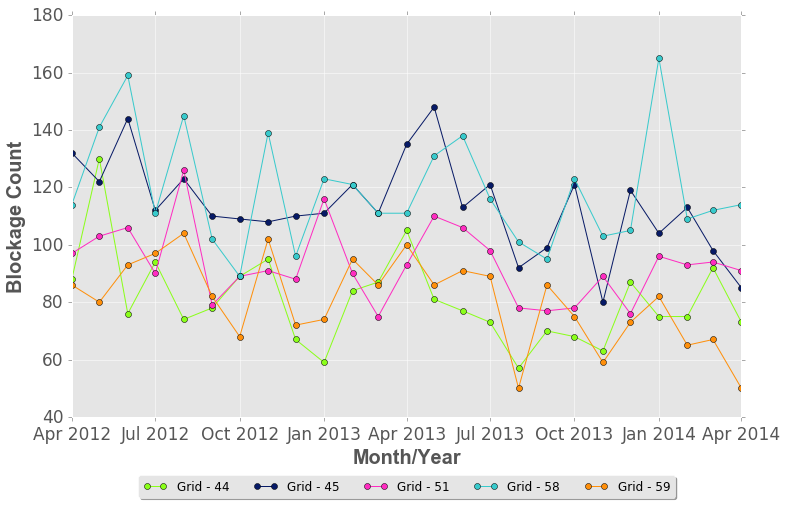

In [20]:
for blockageType in blockageTypes:
   for file in onlyfiles:
        completeFileGridAnalysis = '{0}\\{1}'.format(folderLocationData20, file)
        timeSeriesMonthly = pd.read_csv(completeFileGridAnalysis, sep=',', parse_dates=[1], header=0,
                                        names=['GridId', 'MonthYear', 'Index', 'Fat', 'Sanitary Products', 'Roots',
                                               'Other',
                                               'Unknown', 'TotalWithoutUnknown', 'Total'],
                                        date_parser=dateparseMonthly, index_col='MonthYear')
        arrayOfTimeSeries.append(timeSeriesMonthly['Total'])
       
        fileComponents = file.split('_')
        gridId = fileComponents[0][4:]
        lab = 'Grid - {0}'.format(gridId)
        arrayOfLabels.append(lab)
        if i == 5:
            ShowGraph(arrayOfTimeSeries,arrayOfLabels,numberOfPlot=numberOfplots)
            arrayOfLabels = []
            arrayOfTimeSeries = []
            i=0
            numberOfplots +=1
        i +=1


#ShowGraph(arrayOfTimeSeries,arrayOfLabels,numberOfPlot=numberOfplots)